<a href="https://colab.research.google.com/github/PhoenixChakraborty/IITK-Python-for-AI-ML-DL/blob/main/Proj_13_Convolutional_NN_Fashion_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


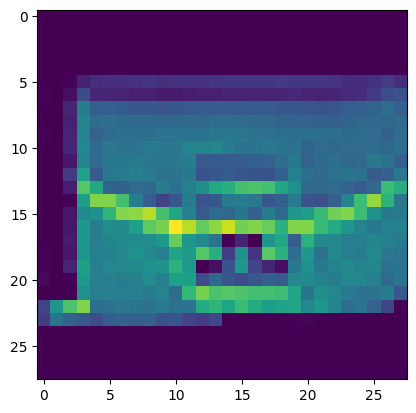

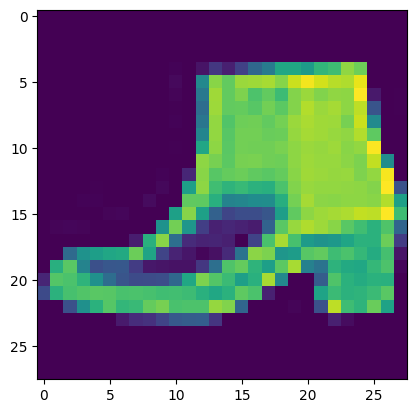

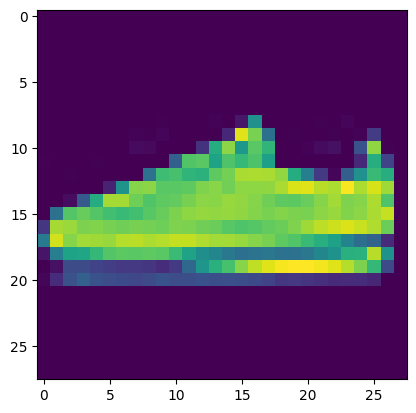

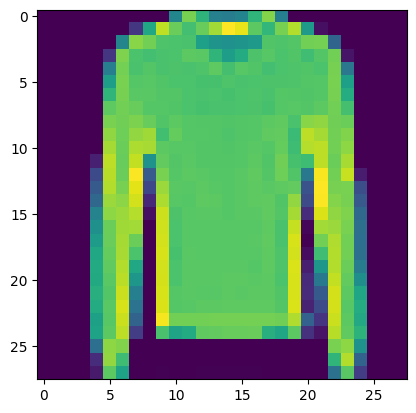

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 0.5591 - sparse_categorical_accuracy: 0.7933 - val_loss: 0.3068 - val_sparse_categorical_accuracy: 0.8869
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2495 - sparse_categorical_accuracy: 0.9076 - val_loss: 0.2377 - val_sparse_categorical_accuracy: 0.9130
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2016 - sparse_categorical_accuracy: 0.9248 - val_loss: 0.2448 - val_sparse_categorical_accuracy: 0.9157
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy score is 91.57 %
Confusion matrix of Neural Network is 
 [[907   0  15  10   2   1  62   0   3   0]
 [  4 976   0  15   1   0   2   0   2   0]
 [ 13   0 910   9  28   0  40   0   0   0]
 [ 28   1  11 895  30   0  34   0   1   0]
 [  0   0  88  20 846   0  45   0   1   0]
 [  0   0   0   0   0 987   0  10   0   3]
 [129   0  78  24  55   0 710   0   4   0]
 [  0   0   0   0   0   2   0 991   0   7]
 [  3   0   1   1   0   1   4   3 987   0]
 [ 

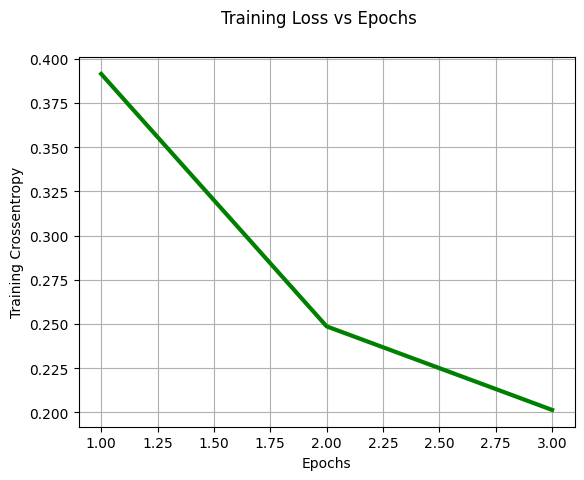

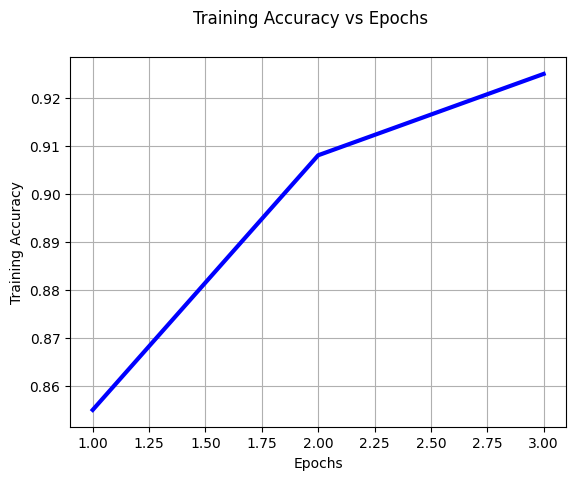

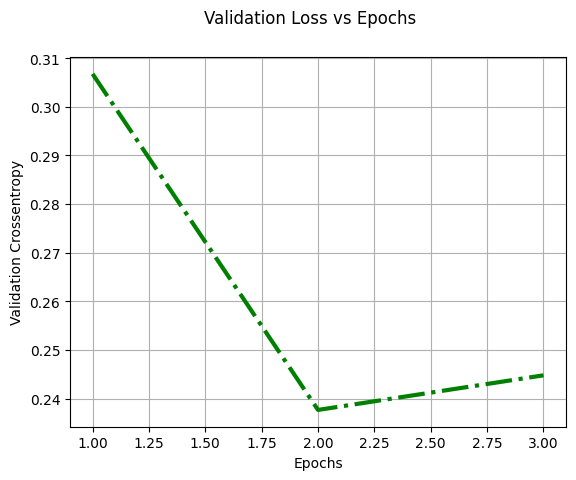

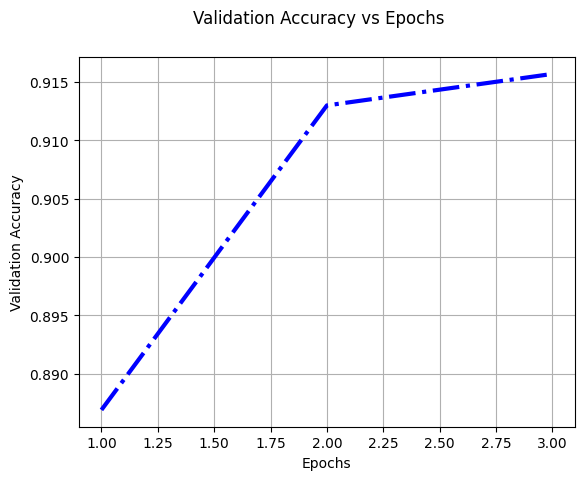

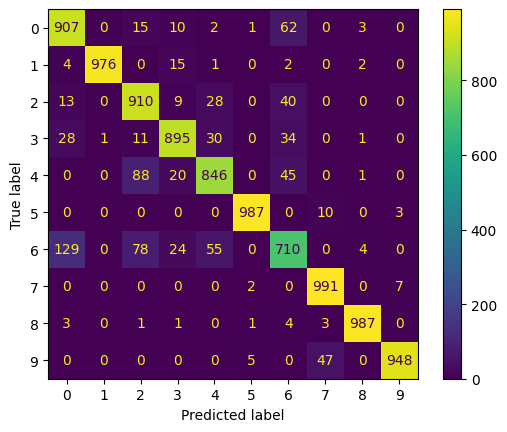

In [1]:
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
nc = 10 # Number of classes

(Xtrain, ytrain), (Xtest, ytest) = fashion_mnist.load_data()

#Fashion-MNIST is a dataset of Zalando's article images—consisting of a
#training set of 60,000 examples and a test set of 10,000 examples.
#Each example is a 28x28 grayscale image, associated with a label from 10 classes.

#Each training and test example is assigned to one of the following labels:

#0 T-shirt/top
#1 Trouser
#2 Pullover
#3 Dress
#4 Coat
#5 Sandal
#6 Shirt
#7 Sneaker
#8 Bag
#9 Ankle boot

#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

plt.figure(3)
imgplot3 = plt.imshow(Xtest[nr.randint(10000)])
plt.show()

plt.figure(4)
imgplot4 = plt.imshow(Xtest[nr.randint(10000)])
plt.show()


Xtrain = Xtrain.reshape(60000,28,28,1)
Xtest = Xtest.reshape(10000,28,28,1)

Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain/ 255.0
Xtest = Xtest.astype('float32')
Xtest = Xtest / 255.0

model = Sequential()
model.add(Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
history = model.fit(Xtrain, ytrain,epochs=3, validation_data=(Xtest, ytest))

ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)

score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')

cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')

plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['sparse_categorical_accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_sparse_categorical_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()